In [84]:
import os
import pickle
from scipy.io.wavfile import read
from sklearn.mixture import GaussianMixture 
from sklearn import preprocessing
import numpy as np
import python_speech_features as mfcc
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

#Calculate and returns the delta of given feature vector matrix
def calculate_delta(array):
    rows,cols = array.shape
    deltas = np.zeros((rows,20))
    N = 2
    for i in range(rows):
        index = []
        j = 1
        while j <= N:
            if i-j < 0:
                first = 0
            else:
                first = i-j
            if i+j > rows -1:
                second = rows -1
            else:
                second = i+j
            index.append((second,first))
            j+=1
        deltas[i] = ( array[index[0][0]]-array[index[0][1]] + (2 * (array[index[1][0]]-array[index[1][1]])) ) / 10
    return deltas

#convert audio to mfcc features
def extract_features(audio,rate):    
    mfcc_feat = mfcc.mfcc(audio, rate, 0.025, 0.01,20,appendEnergy = True, nfft=1200)
    mfcc_feat = preprocessing.scale(mfcc_feat) #Standarization Gaussian with zero mean and unit variance.
    delta = calculate_delta(mfcc_feat)

    #combining both mfcc features and delta
    combined = np.hstack((mfcc_feat,delta)) 
    return combined

            0         1         2         3         4         5         6   \
0   -12.212095  1.464296  0.912070 -1.894056  0.116228 -1.642384  1.047175   
1     0.539528  0.282147 -0.238440  0.524371  1.287634 -2.862031 -0.323818   
2     1.350872 -0.139313 -1.538416  2.119005  2.576842 -1.158723 -0.528243   
3     1.374840 -0.132117 -1.505557  2.516180  3.310577  0.021519  0.517095   
4     1.193064  0.204600 -1.745180  1.176140  3.349454  1.690802  1.278078   
..         ...       ...       ...       ...       ...       ...       ...   
463  -0.444401 -0.482504  0.073480 -0.745155 -0.669490 -0.458064  0.173394   
464  -0.492518 -0.507517  0.081725 -0.707810 -0.331019  0.173334  0.272298   
465  -0.502487 -0.535151  0.025855 -0.942588 -0.213909  0.558015  0.186898   
466  -0.504708 -0.411787  0.337952 -0.616802 -0.194694  0.322546 -0.299744   
467  -0.489734 -0.454401  0.472461 -0.442213 -0.445880 -0.325773 -0.816938   

           7         8         9   ...        30        31     

Text(0.5, 1.0, 'Raw .wav')

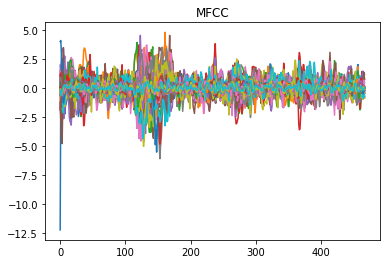

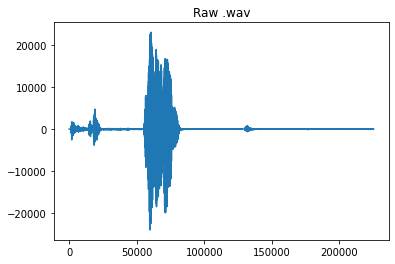

In [85]:
notebook_path = os.path.abspath("computing.ipynb")
source = os.path.join(os.path.dirname(notebook_path) + "/voice_database/Jeslyne/1.wav")

(sr, audio) = read(source)
features = extract_features(audio, sr)
print(pd.DataFrame(features))

plt.figure(1)
plt.plot(pd.DataFrame(features))
plt.title('MFCC')

plt.figure(2)
plt.plot(audio)
plt.title('Raw .wav')

           0         1         2         3         4         5         6   \
0   -0.343273 -0.454483 -0.118114 -0.347402 -0.340984 -0.412065  0.003055   
1    0.221098  1.102017  1.360760  0.979308  0.103290 -0.011646 -0.311828   
2    2.412972  1.318647 -1.751035  2.287378  2.605682 -0.162043 -2.655065   
3    1.872814  2.338342 -0.303789  1.128047  1.150203  1.903073 -2.905038   
4    2.834660 -1.483628 -3.001353  2.303613 -1.804605 -1.072604  0.114010   
5   -0.528851 -0.451393  0.294167 -0.392628 -0.116291 -0.185606 -0.118841   
6    1.110594  2.848641  1.960899  0.211735  1.364915  1.970917  1.239497   
7    0.582563  0.470695 -0.856897  0.979449  1.425137  0.601808  0.930792   
8    0.553891  2.270498  0.627398 -2.019267 -1.248916  0.891943  0.280103   
9   -0.442658 -0.309063 -0.306740 -1.455514 -0.883455 -0.178333  0.812051   
10  -0.197507 -0.243239  0.148533  0.366637  0.339151  0.162920  0.176980   
11   2.367391  1.620756 -2.697286  0.970901  2.636121  2.214797 -1.351667   

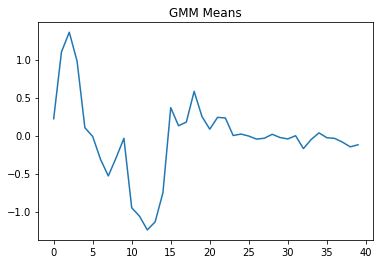

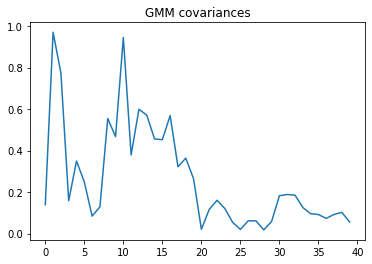

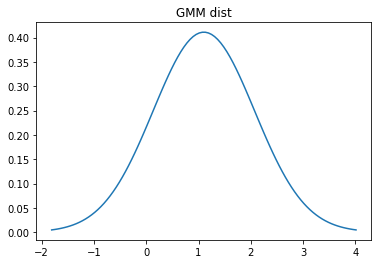

      0
0    15
1     7
2     7
3     7
4     7
..   ..
463   0
464   5
465   5
466   5
467   5

[468 rows x 1 columns]
[ 2.33404201e+02 -7.37687964e+01 -6.69010062e+01 -5.59173278e+01
 -4.15839965e+01 -3.93275078e+01 -3.18810093e+01 -2.80986098e+01
 -2.07997297e+01 -1.99055687e+01 -2.03172885e+01 -1.84673544e+01
 -1.70855899e+01 -2.04644180e+01 -2.02405854e+01 -2.46883167e+01
 -2.64502210e+01 -2.83836647e+01 -3.01322903e+01 -2.80754682e+01
 -2.68079881e+01 -2.61819190e+01 -2.08488456e+01 -2.18895929e+01
 -1.76519309e+01 -2.16508325e+01 -1.92225000e+01 -2.91116090e+01
 -3.06123270e+01 -2.50421867e+01 -2.40787539e+01 -1.99914415e+01
 -2.28609743e+01 -2.95909593e+01 -3.80844693e+01 -5.12245410e+01
 -3.28757642e+01 -2.83072960e+01 -2.43606829e+01 -2.11848361e+01
 -2.85054434e+01 -2.89419932e+01 -3.25809460e+01 -2.22172693e+01
 -2.54767591e+01 -2.11366451e+01 -2.65605753e+01 -2.70550941e+01
 -3.70170493e+01 -1.33049555e+01 -1.60273615e+01 -6.07943768e+00
 -7.99025033e+00 -3.09015868e+00 -3

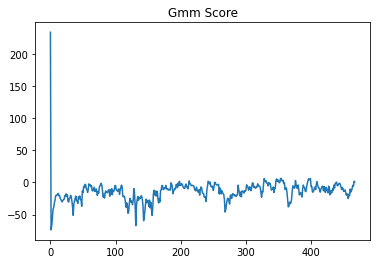

In [95]:
gmm = GaussianMixture(n_components = 16, max_iter = 1000, covariance_type='diag',n_init = 3)
predict = gmm.fit_predict(features)

print(pd.DataFrame(gmm.means_))
print(pd.DataFrame(gmm.covariances_))

plt.figure(1)
plt.title('GMM Means')
plt.plot(gmm.means_[1,:])
plt.figure(2)
plt.title('GMM covariances')
plt.plot(gmm.covariances_[1,:])
plt.figure(3)
plt.title('GMM dist')
mu = gmm.means_[1,1]
sigma = gmm.covariances_[1,1]
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

print(pd.DataFrame(predict))
plt.figure(4)
Z = gmm.score_samples(features)
print(Z)
plt.title('Gmm Score')
plt.plot(Z)

scores = np.array(gmm.score(features))
print(scores)